# ICE 7 Diagnostic Metrics

Yiran Charlotte Wang

## Objectives:

1. Identify the correct model diagnostic metric(s) for performance
2. Implement at least one model diagnostic metric for a model you have built for ACA2 or ACA3

## Analysis Challenge Assignment 2
#### **Authors**: Yutong Shen, Jingfei Chen, Yiran Wang

**Tasks:**

- Build a classifier that can predict on or off-task behavior with the aca2_dataset_training.csv data.

- You can choose any or multiple features to include in your classifier.

- You can choose any or multiple algorithms to build you classifier.

- You may need to be strategic in terms of selecting variables, recoding some of the variables, or making reasonable transformations.

- Necessary descriptive analysis (e.g., mean, sd, correlation) is highly recommended.

- Be sure to report your model performance on aca2_dataset_validation.csv.

- Make sure the process (both data clean and analysis) is clearly documented, and your code is reproducible.

- Write one or two brief paragraphs on your interpretation of the result. What does the result mean to you?

**Following the task instructions, in ACA2, we defined our classifer as follows:**


*   **Features**:
* We performed feature selection using *Recursive Feature 
Elimination* and choose mutiple features to include in our Feature Set 1 - "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "SCHOOL", and "CODER".
* Other than using RFE, we also choose the features based on our own reasoning and multiple attempts to include in our Feature Set 2 - "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "Activity", and "Class".
*   **Algorithms**: Logistic Regression, Decision Tree



**1. Import Training Data**

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
# read the training data
data = pd.read_csv("/Users/Wyr/Desktop/HUDK 4050/ACA/ACA 2/aca2_dataset/aca2_dataset_training.csv")
data

,UNIQUEID,SCHOOL,Class,GRADE,CODER,STUDENTID,Gender,OBSNUM,totalobs-forsession,Activity,ONTASK,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
0,34880,A,T8T,2,Z,965160,1,12,224,Wholecarpet,Y,1,2,1,2,1390.500000,0.000664,1027
1,32344,B,T9U,3,Z,11665,1,11,225,Individual,Y,2,3,2,3,890.333333,0.002545,213
2,14774,B,T9Q,0,Z,187441,0,21,374,Smallgroup,Y,3,4,1,2,770.500000,0.001439,2078
3,19468,A,T8S,1,Z,402837,0,17,320,Wholedesks,Y,5,6,0,1,592.333333,0.001407,3229
4,31570,B,T9T,2,Z,300647,1,2,35,Wholedesks,Y,2,3,1,2,870.000000,0.005882,260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22179,30762,B,T9Q,0,Z,749212,1,5,95,Wholecarpet,Y,2,3,2,3,969.000000,0.002959,652
22180,14611,B,T9Q,0,Z,87701,0,12,211,Smallgroup,N,3,4,1,2,770.500000,0.001439,708
22181,20432,A,T8VQ,4,Z,130859,0,6,95,Smallgroup,N,1,2,0,1,1060.000000,0.000472,362
22182,38264,E,T6Q,0,Y,874565,1,10,147,Wholedesks,Y,1,2,1,2,1204.500000,0.000838,60


**2. Descriptive Analysis**

We will show some descriptive analysis in this part. Getting the desctiptive data as well as graphing the scatterplot will help us understand the data better from the very beginning.

In [35]:
# get some descriptive data 
data['ONTASK'].value_counts()

Y    14938
N     7246
Name: ONTASK, dtype: int64

In [36]:
data.describe()

,UNIQUEID,GRADE,STUDENTID,Gender,OBSNUM,totalobs-forsession,TRANSITIONS,NumACTIVITIES,FORMATchanges,NumFORMATS,Obsv/act,Transitions/Durations,Total Time
count,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000,22184.000000
mean,28256.558556,2.056076,506965.948521,0.506446,9.621168,170.693608,2.383114,3.383114,1.534304,2.534304,973.525214,0.003159,774.587811
std,8030.006461,1.503220,283257.429497,0.499970,5.702232,105.788938,1.315163,1.315163,1.229399,1.229399,454.538354,0.010309,665.169774
min,14400.000000,0.000000,1123.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,387.000000,0.000000,0.000000
25%,21276.750000,1.000000,264220.000000,0.000000,5.000000,82.000000,1.000000,2.000000,1.000000,2.000000,721.200000,0.000839,252.000000
50%,28263.500000,2.000000,514301.000000,1.000000,9.000000,165.000000,2.000000,3.000000,1.000000,2.000000,876.250000,0.001513,586.500000
75%,35231.250000,4.000000,743450.000000,1.000000,14.000000,248.000000,3.000000,4.000000,2.000000,3.000000,1106.750000,0.003268,1121.000000
max,42130.000000,4.000000,999979.000000,1.000000,32.000000,511.000000,6.000000,7.000000,5.000000,6.000000,2735.000000,0.666667,3554.000000


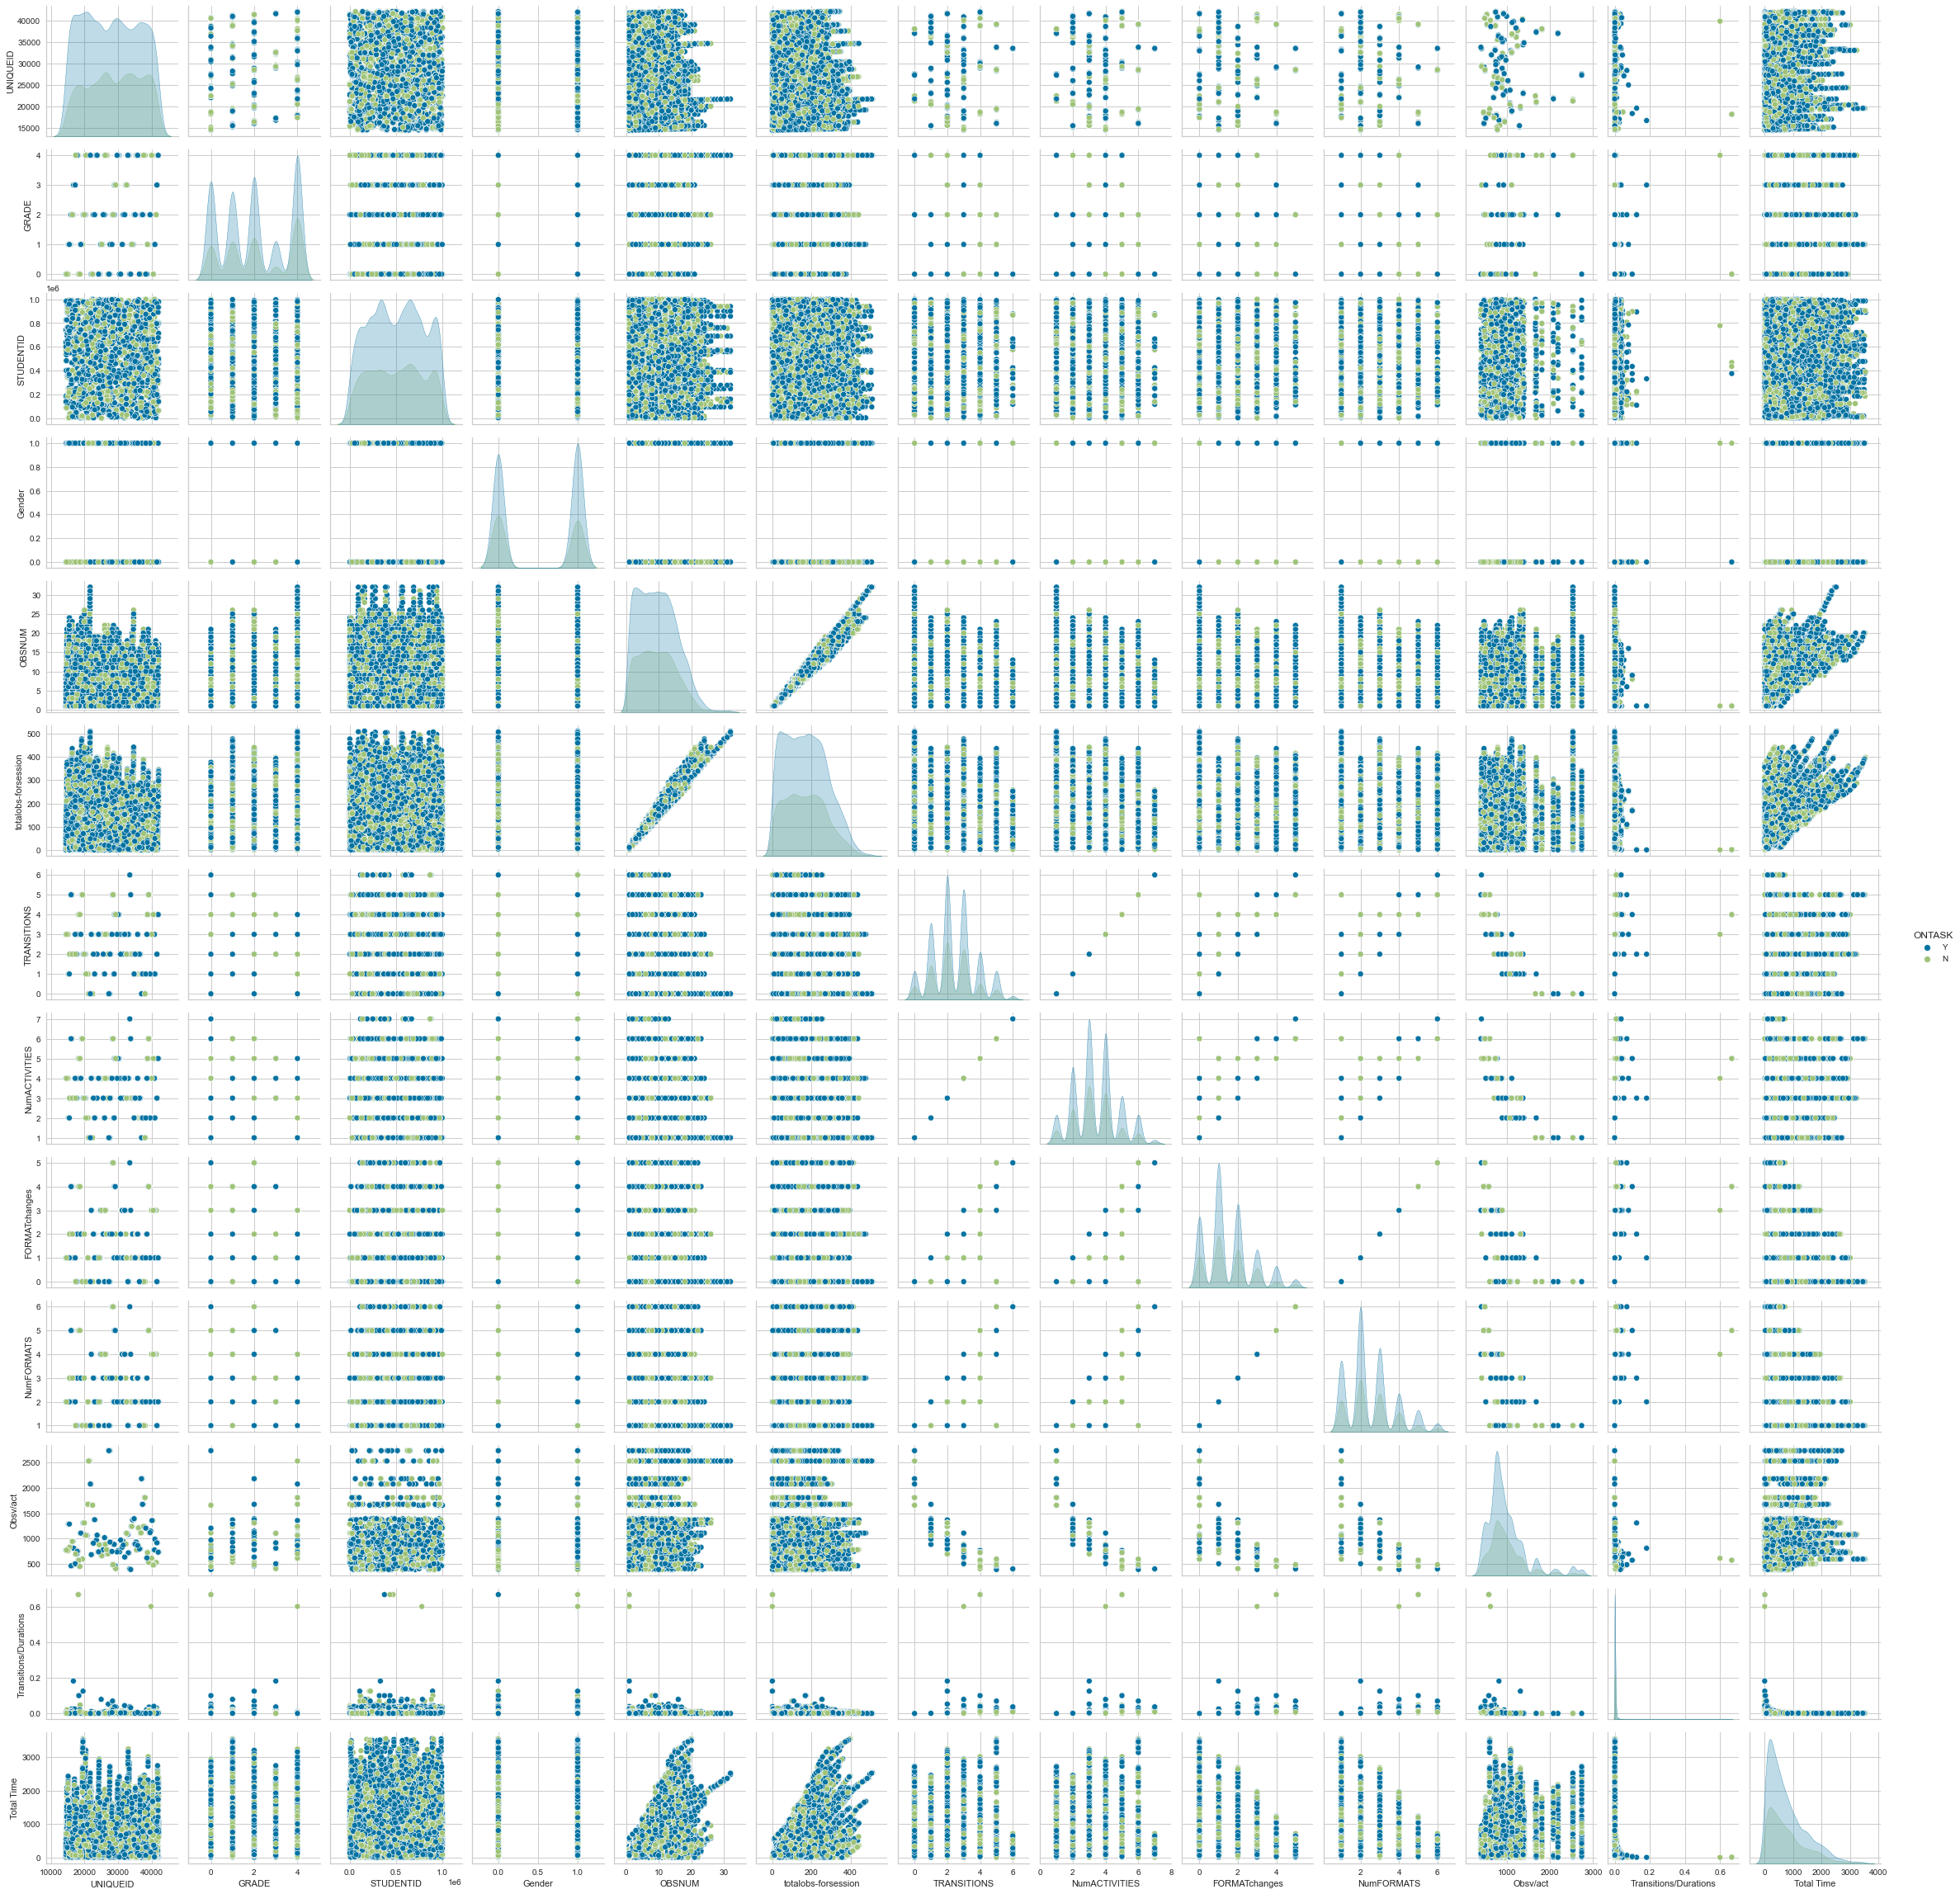

In [37]:
# use seaborn package to get a scatter matrix
import seaborn as sns
sns.pairplot(data, hue = "ONTASK")

**3. Create Dummy Variables**

Based on the dataset, we need to create two dummy variables, which are ONTASK and CODER. 

In [38]:
# create a dummy variable for ONTASK
dummyONTASK = pd.get_dummies(data['ONTASK'], prefix = 'ONTASK') 
data = pd.concat([data, dummyONTASK], axis=1)
data = data.drop(['ONTASK', 'ONTASK_N'], axis=1)
# data

In [39]:
# create a dummy variable for CODER
dummyCODER = pd.get_dummies(data['CODER'], prefix = 'CODER') 
data = pd.concat([data, dummyCODER], axis=1)
data = data.drop(['CODER', 'CODER_Y'], axis=1)
# data

**4. Recode Some of the Variables**

We convert three varaibles into catergorical labels, which are "Activity", "SCHOOL", and "Class". We recode them as "Activity_cat", "SCHOOL_cat", and "Class_cat".

In [40]:
# convert Activity to a category, then use those category values for label encoding
data['Activity'] = data['Activity'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["Activity_cat"] = data["Activity"].cat.codes
data = data.drop(['Activity'], axis=1)

In [41]:
# convert SCHOOL to a category, then use those category values for label encoding
data['SCHOOL'] = data['SCHOOL'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["SCHOOL_cat"] = data["SCHOOL"].cat.codes
data = data.drop(['SCHOOL'], axis=1)

In [42]:
# convert Class to a category, then use those category values for label encoding
data['Class'] = data['Class'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
data["Class_cat"] = data["Class"].cat.codes
data = data.drop(['Class'], axis=1)

**5. Feature Selection**

We choose to use feature selection to decide which variables should be included in our classifier. Among multiple algorithms, recursive feature elimination is our pick.

Rfe is effective in eliminating the features from the training dataset. It can quickly help us filter the variables that are most relevant in predicting the target variable. 

In [43]:
# Feature Selection with Sci-Kit:
# RECURSIVE FEATURE ELIMINATION
# Feature ranking with recursive feature elimination 

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = data.drop(['ONTASK_Y'], axis=1)   # drop the ONTASK_Y column
y = data['ONTASK_Y']
names=pd.DataFrame(X.columns)

# use logistic regression as the model
logit_reg = LogisticRegression(max_iter=2000)

# This is to select 8 variables: can be changed and checked in model for accuracy
rfe_mod = RFE(logit_reg, 8, step=1) 
myvalues=rfe_mod.fit(X,y)  # to fit
myvalues.support_   # The mask of selected features
myvalues.ranking_   # The feature ranking, such that ranking_[i] corresponds to the ranking position of the i-th feature. Selected (i.e., estimated best) features are assigned rank 1

rankings=pd.DataFrame(myvalues.ranking_) # Make it into data frame
rankings

/Users/Wyr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass n_features_to_select=8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


,0
0,8
1,1
2,9
3,1
4,4
5,5
6,1
7,1
8,1
9,1


Variables in the 2, 4, 7-10, 14, and 16 position ( a total of 8 variables) were selected for inclusion in a model. This is because we specified 8 variables as the preferred number of features. At this point, the feature names are not printed, only their position. 

In [44]:
# Concat and name columns
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

# Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

          Feature  Rank
1           GRADE     1
3          Gender     1
6     TRANSITIONS     1
7   NumACTIVITIES     1
8   FORMATchanges     1
9      NumFORMATS     1
13        CODER_Z     1
15     SCHOOL_cat     1


8

The code prints the variables ranked highest above the threshold specified.  Their rank is concatenated with the name of the feature for easier interpretation.

Thus, the 8 variables that will be included in our Feature Set 1 includes: "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "SCHOOL_cat", and "CODER_Z".

As mentioned at the beginning, other than using RFE, we also choose Feature Set 2 variables based on our own reasoning. Feature Set 2 variables includes: "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "Activity_cat", and "Class_cat".

**6. Import Validation Data**

In [47]:
# read the validation data
testData = pd.read_csv("/Users/Wyr/Desktop/HUDK 4050/ACA/ACA 2/aca2_dataset/aca2_dataset_validation.csv")

**7. Prepare Validation Data the same way as Training Data**

In [48]:
# create a dummy variable for ONTASK
dummyONTASK2 = pd.get_dummies(testData['ONTASK'], prefix = 'ONTASK') 
testData = pd.concat([testData, dummyONTASK2], axis=1)
testData = testData.drop(['ONTASK', 'ONTASK_N'], axis=1)

In [49]:
# create a dummy variable for CODER
dummyCODER2 = pd.get_dummies(testData['CODER'], prefix = 'CODER') 
testData = pd.concat([testData, dummyCODER2], axis=1)
testData = testData.drop(['CODER', 'CODER_Y'], axis=1)

In [50]:
# convert Activity to a category, then use those category values for label encoding
testData['Activity'] = testData['Activity'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["Activity_cat"] = testData["Activity"].cat.codes
testData = testData.drop(['Activity'], axis=1)

In [51]:
# convert SCHOOL to a category, then use those category values for label encoding
testData['SCHOOL'] = testData['SCHOOL'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["SCHOOL_cat"] = testData["SCHOOL"].cat.codes
testData = testData.drop(['SCHOOL'], axis=1)

In [52]:
# convert Class to a category, then use those category values for label encoding
testData['Class'] = testData['Class'].astype('category')
# assign the encoded variable to a new column using the cat.codes accessor
testData["Class_cat"] = testData["Class"].cat.codes
testData = testData.drop(['Class'], axis=1)

**8. Build our Classifier**

For classifer selection, we apply two approaches for comparison: logistic regression & decision tree.

- Logistic regression is the most common approach for classification and is easy to compute.
- Decision tree does not set strict requirements for data either normalization or missing data.

We will compare the accuracy of two approaches in the end.

**8.1. Using Logistic Regression**

In [53]:
# create an array of X_train, and an arrary for the training labels y_train
X_train1 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_train2 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_train = y.values.reshape(-1, 1)

In [54]:
# Then loading LogisticRegression() and calling for LogisticRegression.fit() 
LogitModel1 = LogisticRegression(max_iter=2000)
LogitModel2 = LogisticRegression(max_iter=2000)
LogitModel1.fit(X_train1, y_train)
LogitModel2.fit(X_train2, y_train)

/Users/Wyr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/Wyr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=2000)

In [55]:
# call for the intercept and coefficients of each parameter and we will have our logistic regression model
print(LogitModel1.intercept_)
print(LogitModel2.intercept_)

[0.53711626]
[0.37074765]


In [56]:
print(LogitModel1.coef_)
print(LogitModel2.coef_)

[[-0.06594436  0.21193494 -0.22245707  0.31112433 -0.30177774  0.23180366
  -0.28806582 -0.08431776]]
[[-0.06780771  0.20101363 -0.14055238  0.22954067 -0.22229562  0.14779743
  -0.03125909  0.00205829]]


**8.1.1 Model Performance**

In [57]:
# create an array of X_test, and an arrary for the training labels y_test
X_test1 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_test2 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_test = testData['ONTASK_Y'].values.reshape(-1, 1)

In [58]:
# Feed the X_train in the testing dataset and obtain the predicted Ys
# Predicted value in sklearn logistic regression model
y_pred1 = LogitModel1.predict(X_test1)
y_pred2 = LogitModel2.predict(X_test2)

In [59]:
# Compare the predicted Ys with what is actually in the testing dataset and obtain the confusion matrix.
from sklearn.metrics import confusion_matrix

# sklearn logistic regression model confusion matrix
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))

[[   0 1849]
 [   0 3698]]
[[   0 1849]
 [   0 3698]]


In [60]:
# Obtaining accuracy scores
from sklearn.metrics import accuracy_score
ac_logit1 = accuracy_score(y_test, y_pred1)
print("The accuracy for logistic regression 1 in sklearn is", ac_logit1*100, "%")
ac_logit2 = accuracy_score(y_test, y_pred2)
print("The accuracy for logistic regression 2 in sklearn is", ac_logit2*100, "%")

The accuracy for logistic regression 1 in sklearn is 66.66666666666666 %
The accuracy for logistic regression 2 in sklearn is 66.66666666666666 %


In [61]:
from sklearn import metrics
import numpy as np

print(metrics.classification_report(y_test, y_pred1, zero_division=0))
print(metrics.classification_report(y_test, y_pred2, zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1849
           1       0.67      1.00      0.80      3698

    accuracy                           0.67      5547
   macro avg       0.33      0.50      0.40      5547
weighted avg       0.44      0.67      0.53      5547

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1849
           1       0.67      1.00      0.80      3698

    accuracy                           0.67      5547
   macro avg       0.33      0.50      0.40      5547
weighted avg       0.44      0.67      0.53      5547



**8.2. Using Decision Tree Classifier**

In [62]:
# create an array of X_train, and an arrary for the training labels y_train
X_train1 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_train2 = data[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_train = data['ONTASK_Y'].values.reshape(-1, 1)

# create an array of X_test, and an arrary for the training labels y_test
X_test1 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','CODER_Z','SCHOOL_cat']].to_numpy()
X_test2 = testData[['GRADE','Gender','TRANSITIONS','NumACTIVITIES','FORMATchanges','NumFORMATS','Activity_cat','Class_cat']].to_numpy()
y_test = testData['ONTASK_Y'].values.reshape(-1, 1)

In [63]:
# plot tree model score based on different max_depth
acc1=[]
acc2=[]
for i in range(1,20):
  treeModel = DecisionTreeClassifier(max_depth=i).fit(X_train1,y_train)
  acc1.append(treeModel.score(X_test1,y_test))
  treeModel = DecisionTreeClassifier(max_depth=i).fit(X_train2,y_train)
  acc2.append(treeModel.score(X_test2,y_test))

plt.plot(acc1)
plt.plot(acc2)

NameError: name 'DecisionTreeClassifier' is not defined

In [64]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

# Create Decision Tree classifer object
treeModel1 = DecisionTreeClassifier(max_depth=5)
treeModel2 = DecisionTreeClassifier()

# Train Decision Tree Classifer
treeModel1 = treeModel1.fit(X_train1,y_train)
treeModel2 = treeModel2.fit(X_train2,y_train)

#Predict the response for test dataset
y_pred1 = treeModel1.predict(X_test1)
y_pred2 = treeModel2.predict(X_test2)

**8.2.1 Model Performance**

In [65]:
# sklearn logistic regression model confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred2))

[[ 147 1702]
 [ 117 3581]]
[[ 234 1615]
 [ 192 3506]]


In [66]:
from sklearn import metrics # Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("The accuracy for decision tree 1 is:",metrics.accuracy_score(y_test, y_pred1)*100, "%")
print("The accuracy for decision tree 2 is:",metrics.accuracy_score(y_test, y_pred2)*100, "%")

The accuracy for decision tree 1 is: 67.20749954930592 %
The accuracy for decision tree 2 is: 67.42383270236164 %


In [67]:
from sklearn import metrics
import numpy as np

print(metrics.classification_report(y_test, y_pred1))
print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.56      0.08      0.14      1849
           1       0.68      0.97      0.80      3698

    accuracy                           0.67      5547
   macro avg       0.62      0.52      0.47      5547
weighted avg       0.64      0.67      0.58      5547

              precision    recall  f1-score   support

           0       0.55      0.13      0.21      1849
           1       0.68      0.95      0.80      3698

    accuracy                           0.67      5547
   macro avg       0.62      0.54      0.50      5547
weighted avg       0.64      0.67      0.60      5547



**9. Interpretation**

Feature Set 1 variables includes: "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "SCHOOL_cat", and "CODER_Z".

Feature Set 2 variables includes: "GRADE", "Gender", "TRANSITIONS", "NumACTIVITIES", "FORMATchanges", "NumFORMATS", "Activity_cat", and "Class_cat".

The difference betweeen Feature Set 1 & 2 are in School + Coder & Activity + Class.

The RFE suggested that school and coder would give us a more accurate prediction on whether the student is ontask or not. 'School' as a general variable could have lead to a difference in the result. 'Coder' as the person who coded on/off task behavior could have bring in personal bias when recording the behavior.

However, we believe that 'Activity' as the different format of activities could lead to engagement difference and change whether a student is on/off task. 'Class' would be another variable that should be taken into consideration because the class environment of having more children on/off task could impact a child's behavior. These variables could help researchers to see what they can do to imporve the children's behavior such as choosing more engaging activities to conduct or improve the overall class environment.


In our analysis above, we have taken Feature Set 1 variables and Feature Set 2 variables to conduct both Logistic regression and decision tree.
The accuracy rate reflects how each Feature Set using the classifiers can predict on or off-task behavior accurately with the training dataset.

When taking Feature Set 1 variables, we got 66.66% accuracy using logistic regression and 67.21% accuracy when using decision tree.
When taking Feature Set 2 variables, we got 66.66% accuracy using logistic regression and 67.42% accuracy when using decision tree.

Based on the classification report, we can see that decision tree performs better in predicting on or off-task behavior using both Feature Set variables.
Based on the above, we will choose to use Feature Set 2 variables and the decision tree classifier because it performs slightly better than the others.

## Analysis Challenge Assignment 3
#### **Authors**: Yutong Shen, Jingfei Chen, Yiran Wang

**Tasks:**

- Identify and alleviate barriers to educational achievement
- Develop a more data-based approach to decision making
- Identify clusters of similar colleges and universities

**Following the task instructions, in ACA3, we developed our approach as follows:**

**Variables:**


- **'CONTROL':** Control of institution,
- **'LOCALE':** Locale of institution,
- **'CCSIZSET':** Carnegie Classification -- size and setting,
- **'DISTANCEONLY':** Flag for distance-education-only education,
- **'NPT4_PUBPRIV':** Average net price for Title IV institutions, 
- **'NPT41_PUBPRIV':** Average net price for $0-30,000 family income,
- **'NUM4_PUBPRIV':** Number of Title IV students,
- **'COSTT4':** Average cost of attendance,
- **'PFTFAC':** Proportion of faculty that is full-time,
- **'AVGFACSAL':** Average faculty salary,
- **'TUITFTE':** Net tuition revenue per full-time equivalent student,
- **'INEXPFTE':** Instructional expenditures per full-time equivalent student,
- **'C150_4_POOLED':** Completion rate for first-time, full-time students at four-year institutions (150% of expected time to completion/6 years), pooled for two year rolling averages, 
- **'PCTFLOAN':** Percent of all federal undergraduate students receiving a federal student loan.


**Algorithm:** Principal Component Analysis




**1. Import Data**

In [68]:
# Import the packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [69]:
# Import data
data = pd.read_csv("/Users/Wyr/Desktop/HUDK 4050/ACA/ACA 3/CollegeScorecard.csv")
data

/Users/Wyr/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (7,9,1427,1542,1561,1575) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


**2. Clean Data**

In [70]:
data[data['CURROPER'] == 1]  # currently operating institutions

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,COMPL_RPY_3YR_RT_SUPP,NONCOM_RPY_3YR_RT_SUPP,DEP_RPY_3YR_RT_SUPP,IND_RPY_3YR_RT_SUPP,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.578873239,0.373790022,0.442857143,0.45890411,0.443586698,0.452513966,0.484818805,0.406,0.423580786,0.44245283
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.847800926,0.678748759,0.767798013,0.739164697,0.732297853,0.795454545,0.760521886,0.755344418,0.751552795,0.765074771
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.807692308,0.61328125,PrivacySuppressed,0.641114983,0.600877193,0.775,0.610465116,0.686567164,0.632653061,0.65
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.892045455,0.689788054,0.800347222,0.75564409,0.738341969,0.851405622,0.768378651,0.79844098,0.778156997,0.791666667
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.482490272,0.315996848,0.32410212,0.350993377,0.320016821,0.380829016,0.364423718,0.286530612,0.315737052,0.334633385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,157107,1571,Georgia Military College-Columbus Campus,Columbus,GA,31909,NaN,http://columbus.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7800,48285704,157101,1571,Georgia Military College-Valdosta Campus,Valdosta,GA,31605,NaN,http://valdosta.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7801,48285705,157105,1571,Georgia Military College-Warner Robins Campus,Warner Robins,GA,31093,NaN,http://robins.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871
7802,48285706,157100,1571,Georgia Military College-Online,Milledgeville,GA,31061,NaN,http://online.gmc.cc.ga.us/,NaN,...,0.586956522,0.473891273,0.482781027,0.478442281,0.42789148,0.607753706,0.490091055,0.461751152,0.490384615,0.495152871


We will need to manipulate the data frame into a structure that can be analyzed by our clustering algorithm.


In [71]:
# Merge NPT4_PUB with NPT4_PRIV, NPT41_PUB with NPT41_PRIV, COSTT4_A with COSTT4_P, and NUM4_PUB with NUM4_PRIV
listRV = ['NPT4_PUB', 'NPT4_PRIV', 'NPT41_PUB', 'NPT41_PRIV', 'COSTT4_A', 'COSTT4_P', 'NUM4_PUB', 'NUM4_PRIV']
for x in listRV:
    data[x] = data[x].fillna(0)
    
data['NPT4_PUBPRIV'] = data['NPT4_PUB'] + data['NPT4_PRIV']
data['NPT41_PUBPRIV'] = data['NPT41_PUB'] + data['NPT41_PRIV']
data['COSTT4'] = data['COSTT4_A'] + data['COSTT4_P']
data['NUM4_PUBPRIV'] = data['NUM4_PUB'] + data['NUM4_PRIV']

**3. Select Variables**

Following the instructions, we selected 15 variables: 'UNITID', 'CONTROL', 'LOCALE', 'CCSIZSET', 'DISTANCEONLY', 'NPT4_PUBPRIV', 'NPT41_PUBPRIV', 'NUM4_PUBPRIV', 'COSTT4', 'PFTFAC', 'AVGFACSAL', 'TUITFTE', 'INEXPFTE', 'C150_4_POOLED', and 'PCTFLOAN'.

In [72]:
# Select variables
dataS = data[['UNITID', 'CONTROL', 'LOCALE', 'CCSIZSET', 'DISTANCEONLY', 'NPT4_PUBPRIV', 'NPT41_PUBPRIV', 'NUM4_PUBPRIV', 'COSTT4', 'PFTFAC', 
              'AVGFACSAL', 'TUITFTE', 'INEXPFTE', 'C150_4_POOLED', 'PCTFLOAN']]
dataS

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7799,48285703,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7800,48285704,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7801,48285705,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7802,48285706,1,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


**4. Drop Missing Values**

We need to filter out all the NAs because k-Means won't work if it only sees partial data.

In [73]:
# Drop missing values
dataNA = dataS.dropna()
dataNA

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,451741,2,21.0,2.0,0.0,7176.0,7115.0,144.0,11439.0,0.0656,1665.0,3756.0,1195.0,0.588048,0.0000
6238,451750,3,21.0,6.0,0.0,15156.0,14893.0,32.0,21006.0,0.4103,5717.0,13399.0,5489.0,0.217962,0.9010
6239,451769,3,41.0,6.0,0.0,20692.0,17204.0,21.0,26754.0,0.2683,3931.0,22335.0,5171.0,0.396600,0.7786
6289,454184,2,11.0,8.0,0.0,23910.0,22175.0,133.0,44720.0,0.5455,8189.0,10778.0,10645.0,0.590136,0.6151


We scale the variables for PCA to have unit variance.

In [74]:
from sklearn.preprocessing import StandardScaler

data_noid = dataNA.drop(['UNITID'], axis = 1)

scale= StandardScaler()
# standardization of variables
scaled_data = scale.fit_transform(data_noid) 
print(scaled_data)

[[-1.20738015 -0.87045416  0.95111777 ... -0.18242272 -0.90443873
   1.10433813]
 [-1.20738015 -0.87045416  1.21344218 ...  1.11113608  0.09482427
  -0.29526276]
 [ 0.32921123 -0.87045416 -1.14747756 ... -0.49237793 -1.01935196
   0.81763684]
 ...
 [ 1.86580261  2.1435362  -1.14747756 ... -0.48600899 -0.46498389
   0.89591876]
 [ 0.32921123 -0.97438487 -0.62282873 ...  0.24031585  0.50279865
   0.08068988]
 [ 1.86580261 -0.97438487  0.42646893 ... -0.8144076  -1.25406722
   0.2776412 ]]


**5. Use Scikit-Learn's PCA estimator for dimension reduction**

In [75]:
from sklearn.decomposition import PCA

# use PCA for dimensionality reduction
pca = PCA(n_components=14)
pca.fit(scaled_data)

print("The principal components are:")
print(pca.components_)
print("The explained variances are:")
print(pca.explained_variance_)

The principal components are:
[[ 2.13918878e-01 -1.06562430e-01  9.05154400e-02 -1.96446950e-02
   4.44381022e-01  3.21258475e-01 -3.16594257e-02  4.56468902e-01
   2.76625754e-02  2.29799367e-01  4.32377112e-01  2.60250745e-01
   3.25775977e-01  9.93637447e-02]
 [-3.95135668e-01 -1.65210630e-02  3.99526477e-01 -3.28823846e-02
  -1.24099386e-01 -2.93000325e-01  3.12608838e-01  9.26005095e-03
   2.65852508e-01  4.00677114e-01 -6.30241592e-02  2.88670046e-01
   2.59891283e-01 -3.12676662e-01]
 [ 4.15100914e-02 -6.22063689e-01  2.71805572e-01  2.19735337e-01
   5.22928459e-02  1.45718477e-01  4.85333791e-01 -1.41314358e-01
  -3.76241240e-01  5.70707630e-02 -1.21922164e-02 -2.00029201e-01
  -1.24452521e-01  9.59241108e-02]
 [ 2.18813073e-01 -2.01502091e-01 -2.33545157e-01  4.41023875e-01
  -1.73620924e-01 -2.67362549e-01 -2.87080712e-01 -7.66640239e-03
  -3.41910761e-01  8.76341209e-02  1.47783479e-01  3.36411511e-01
   1.01745765e-02 -4.67624197e-01]
 [-4.55581183e-02  3.76376575e-01  1.9

From the explained variances, we can see that the first two components explaining substantially more variances than other components. So we will reduce the the data to two dimensions.

In [76]:
loadings = pd.DataFrame(pca.components_[:2,:].T, columns=['PC1', 'PC2'], index=data_noid.columns)
loadings

,PC1,PC2
CONTROL,0.213919,-0.395136
LOCALE,-0.106562,-0.016521
CCSIZSET,0.090515,0.399526
DISTANCEONLY,-0.019645,-0.032882
NPT4_PUBPRIV,0.444381,-0.124099
NPT41_PUBPRIV,0.321258,-0.293000
NUM4_PUBPRIV,-0.031659,0.312609
COSTT4,0.456469,0.009260
PFTFAC,0.027663,0.265853
AVGFACSAL,0.229799,0.400677


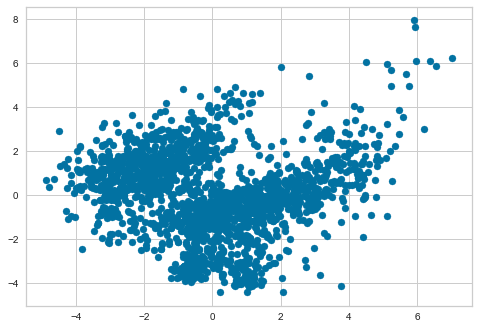

In [77]:
data_dr = pca.transform(scaled_data)
plt.scatter(data_dr[:,0], data_dr[:,1])

**6. Kmeans Clustering**

In [78]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import silhouette_visualizer

# testing Silhouetter Score for PCA transformed data
for x in range(2,15):
  kmeans = KMeans(n_clusters=x)
  kmeans.fit(data_dr)
  cluster_kmeans = kmeans.predict(data_dr)
  silhouetteScore = silhouette_score(data_dr, cluster_kmeans, metric='euclidean')
  print('Silhouetter Score of', x, 'clusters:', silhouetteScore)

Silhouetter Score of 2 clusters: 0.24090557337486507
Silhouetter Score of 3 clusters: 0.2349595974033935
Silhouetter Score of 4 clusters: 0.23965786317544255
Silhouetter Score of 5 clusters: 0.2097847194821927
Silhouetter Score of 6 clusters: 0.20976724700211724
Silhouetter Score of 7 clusters: 0.1990622042705369
Silhouetter Score of 8 clusters: 0.18955325120795416
Silhouetter Score of 9 clusters: 0.18284567394561907
Silhouetter Score of 10 clusters: 0.18133096006805122
Silhouetter Score of 11 clusters: 0.17731141262544786
Silhouetter Score of 12 clusters: 0.1734814157355228
Silhouetter Score of 13 clusters: 0.17596474151785
Silhouetter Score of 14 clusters: 0.1681869795149355


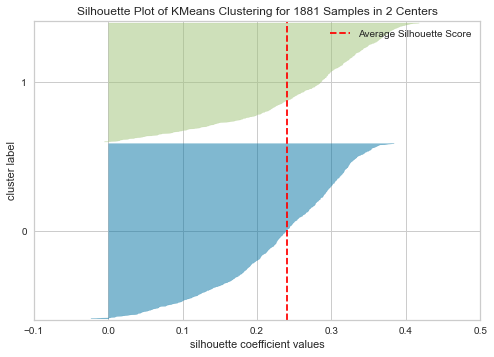

/Users/Wyr/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1881 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', model=None)

In [79]:
# Silhouetter plot for PCA transformed data
kmeans = KMeans(n_clusters=2)
silhouette_visualizer(kmeans, data_dr, colors='yellowbrick')

In [80]:
# testing Silhouetter Score for data without PCA transformation
for x in range(2,15):
  kmeans = KMeans(n_clusters=x)
  kmeans.fit(data_noid)
  cluster_kmeans = kmeans.predict(data_noid)
  silhouetteScore = silhouette_score(data_noid, cluster_kmeans, metric='euclidean')
  print('Silhouetter Score of', x, 'clusters:', silhouetteScore)

Silhouetter Score of 2 clusters: 0.44168698947601104
Silhouetter Score of 3 clusters: 0.3996974542444039
Silhouetter Score of 4 clusters: 0.365162175238847
Silhouetter Score of 5 clusters: 0.3457592568580406
Silhouetter Score of 6 clusters: 0.29182759450409423
Silhouetter Score of 7 clusters: 0.2967003336919315
Silhouetter Score of 8 clusters: 0.2870935972836958
Silhouetter Score of 9 clusters: 0.2844340588628011
Silhouetter Score of 10 clusters: 0.2876053738828087
Silhouetter Score of 11 clusters: 0.2766244431517241
Silhouetter Score of 12 clusters: 0.26981728870913163
Silhouetter Score of 13 clusters: 0.24469309362038152
Silhouetter Score of 14 clusters: 0.24634932813901872


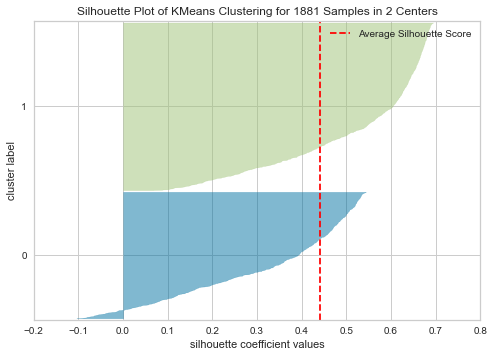

/Users/Wyr/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 1881 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick', model=None)

In [81]:
# Silhouetter plot for data without PCA transformation
kmeans = KMeans(n_clusters=2)
silhouette_visualizer(kmeans, data_noid, colors='yellowbrick')

The silhouette coefficient for data without PCA transformation is higher. So we will not use PCA transformed data.

The silhouette coefficient drops as the number of clusters increases. So we will say n_clusters = 2 is a more reasonable classification.

Below we use Kmeans to try to pick up the 2 clusters.

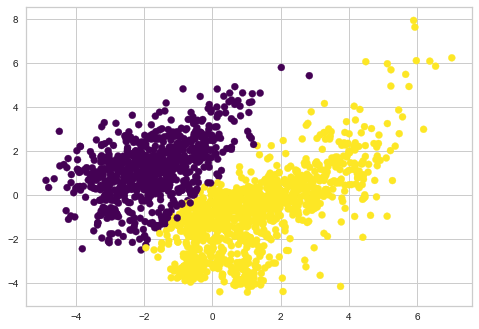

In [82]:
# use Kmeans to pick the clusters up for PCA transformed data

kmeans = KMeans(n_clusters=2)
kmeans.fit(data_dr)
cluster_kmeans = kmeans.predict(data_dr)

plt.scatter(data_dr[:, 0], data_dr[:, 1], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

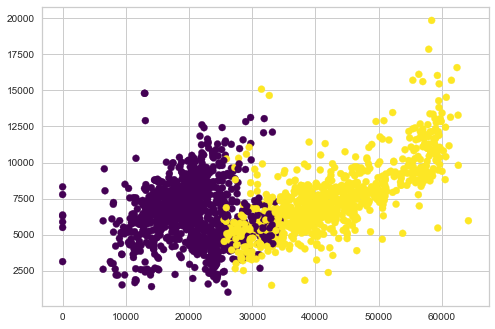

In [83]:
# use Kmeans to pick the clusters up for data without PCA transformation
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_noid)
cluster_kmeans = kmeans.predict(data_noid)
cluster_college = kmeans.predict(data_noid)

# Since the data is not two-dimensional, we are showing an example of the plots by selecting two columns: 'COSTT4' and 'AVGFACSAL'
plt.scatter(data_noid['COSTT4'], data_noid['AVGFACSAL'], c=cluster_kmeans, cmap='viridis') # Use cluster_means as the indicator for clusters

Now let's create a new dataframe to contain the clustering result. 

In [84]:
collegeCluster = dataNA.copy(deep=True)
collegeCluster['cluster'] = cluster_college
collegeCluster

,UNITID,CONTROL,LOCALE,CCSIZSET,DISTANCEONLY,NPT4_PUBPRIV,NPT41_PUBPRIV,NUM4_PUBPRIV,COSTT4,PFTFAC,AVGFACSAL,TUITFTE,INEXPFTE,C150_4_POOLED,PCTFLOAN,cluster
0,100654,1,12.0,14.0,0.0,13415.0,12683.0,607.0,18888.0,0.8856,7079.0,9063.0,7459.0,0.308718,0.8204,0
1,100663,1,12.0,15.0,0.0,14805.0,12361.0,893.0,19990.0,0.9106,10170.0,9033.0,17208.0,0.508550,0.5397,0
2,100690,2,12.0,6.0,0.0,7455.0,6736.0,9.0,12300.0,0.6721,3849.0,12057.0,5123.0,0.285738,0.7629,0
3,100706,1,12.0,12.0,0.0,17520.0,14652.0,294.0,20306.0,0.6555,9341.0,8322.0,9352.0,0.478211,0.4728,0
4,100724,1,12.0,13.0,0.0,11936.0,12342.0,889.0,17400.0,0.6641,6557.0,7813.0,7393.0,0.257482,0.8735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6237,451741,2,21.0,2.0,0.0,7176.0,7115.0,144.0,11439.0,0.0656,1665.0,3756.0,1195.0,0.588048,0.0000,0
6238,451750,3,21.0,6.0,0.0,15156.0,14893.0,32.0,21006.0,0.4103,5717.0,13399.0,5489.0,0.217962,0.9010,0
6239,451769,3,41.0,6.0,0.0,20692.0,17204.0,21.0,26754.0,0.2683,3931.0,22335.0,5171.0,0.396600,0.7786,1
6289,454184,2,11.0,8.0,0.0,23910.0,22175.0,133.0,44720.0,0.5455,8189.0,10778.0,10645.0,0.590136,0.6151,1


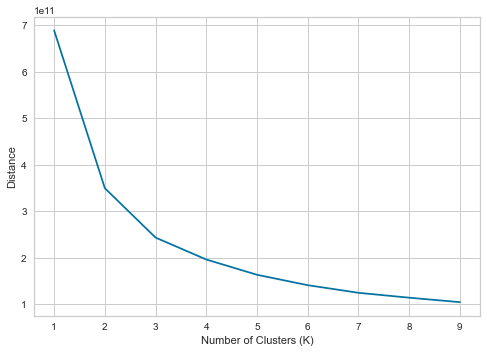

In [88]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

cluster_range = range(1,10)
avg_distance=[]

for n in cluster_range:
    clusterer = KMeans(n_clusters = n).fit(data_noid)
    avg_distance.append(clusterer.inertia_)

plt.plot(cluster_range, avg_distance)
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Distance")
plt.show()

**7. Conclusion**

From the Kmeans clustering, we have grouped our list of universities into two big groups based on the variables we picked.

Even though we cannot tell how significant the differences are at this point, we can clearly see the difference between the two clusters.

Cluster 1 have more private schools and are more urbanized compared to cluster 0. The average net price is much higher for those institutions in cluster 1 than cluster 0. This holds true in the lower income family as well. The average cost of attendance, net tuition revenue, and instructional expenditures are once again much more expensive for the cluster 1 institution than cluster 0 institutions. The faculty members in the cluster 1 institutions enjoys a higher average faculty salary than those in the cluster 0 institutions. There are much more Title IV students in cluster 0 than in cluster 1. Cluster 1 has a slightly higher percent of federal undergraduate students receiving a federal student loan. Cluster 1 enjoys a higher completion rate than cluster 0.
